Grouped data structure:
Homelessness.Type  Overall.Homeless  Overall.Homeless.Individuals  \
Year                                                                
2009                         626652                        390982   
2010                         359859                        201951   
2011                         621556                        386746   
2012                         375559                        211497   
2013                         588581                        367202   

Homelessness.Type  Overall.Homeless.People.in.Families  \
Year                                                     
2009                                            235670   
2010                                            157908   
2011                                            234810   
2012                                            164062   
2013                                            221379   

Homelessness.Type  Sheltered.Total.Homeless  Unsheltered.Homeless  
Year             

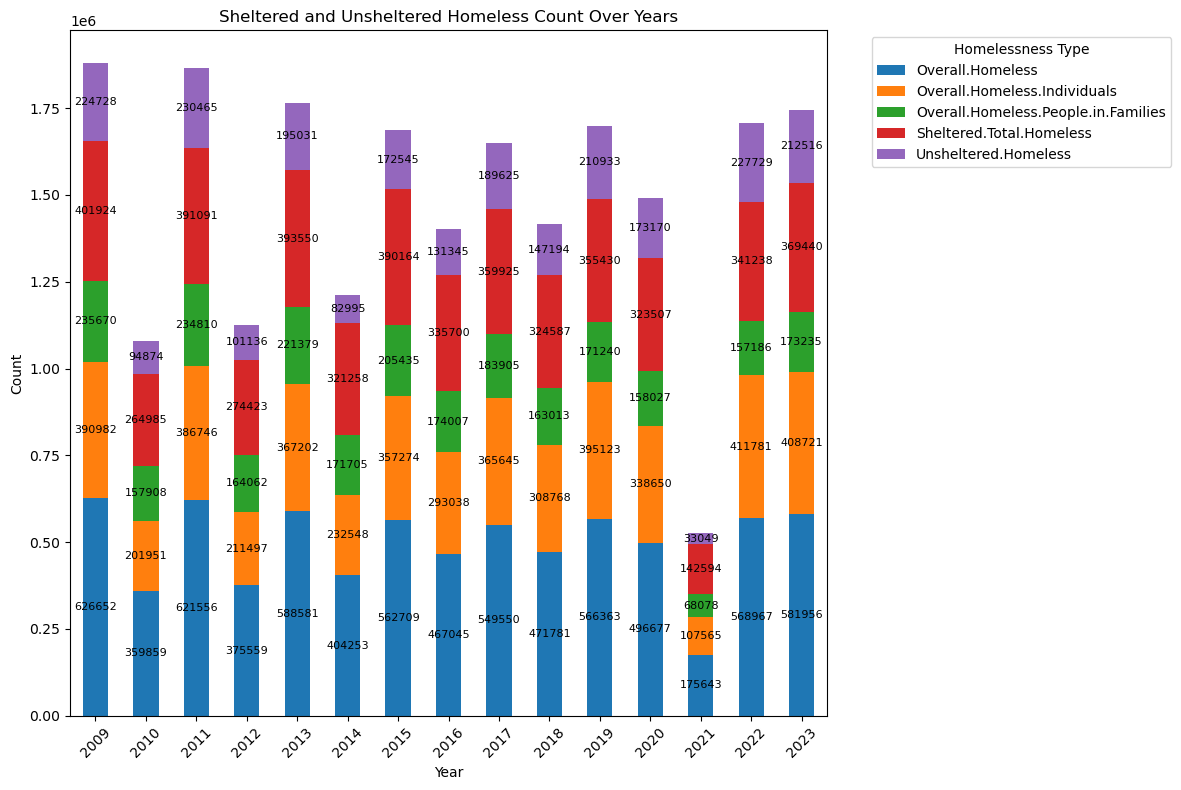

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def process_csv(file_path):
    df = pd.read_csv(file_path)
    df['Year'] = df['Year'].astype(str)
    
    # Select only 'Sheltered and Unsheltered Count' data
    df_filtered = df[df['Count Types'] == 'Sheltered and Unsheltered Count']
    
    # Group by year and homelessness type
    grouped = df_filtered.pivot_table(values='Count', index='Year', 
                                      columns='Homelessness.Type', aggfunc='sum')
    
    print("Grouped data structure:")
    print(grouped.head())
    
    return grouped

def create_plot(data):
    plt.figure(figsize=(12, 8))
    
    # Create stacked bar chart
    data.plot(kind='bar', stacked=True, ax=plt.gca())
    
    plt.title('Sheltered and Unsheltered Homeless Count Over Years')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(title='Homelessness Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.xticks(rotation=45)
    
    # Add value labels
    for i, year in enumerate(data.index):
        bottom = 0
        for col in data.columns:
            value = data.loc[year, col]
            if pd.notna(value) and value > 0:  # Only add labels for non-NaN and positive values
                plt.text(i, bottom + value/2, f'{value:.0f}', ha='center', va='center', fontsize=8)
                bottom += value
    
    plt.tight_layout()
    plt.savefig('homeless_count_plot.png', dpi=300, bbox_inches='tight')
    print("Plot has been saved as 'homeless_count_plot.png'")

def main():
    file_path = r"C:\Users\86133\Desktop\final_dataset.csv"
    data = process_csv(file_path)
    create_plot(data)

if __name__ == "__main__":
    main()

Multi-year pie charts have been saved as 'homeless_count_multi_pie_charts.png'


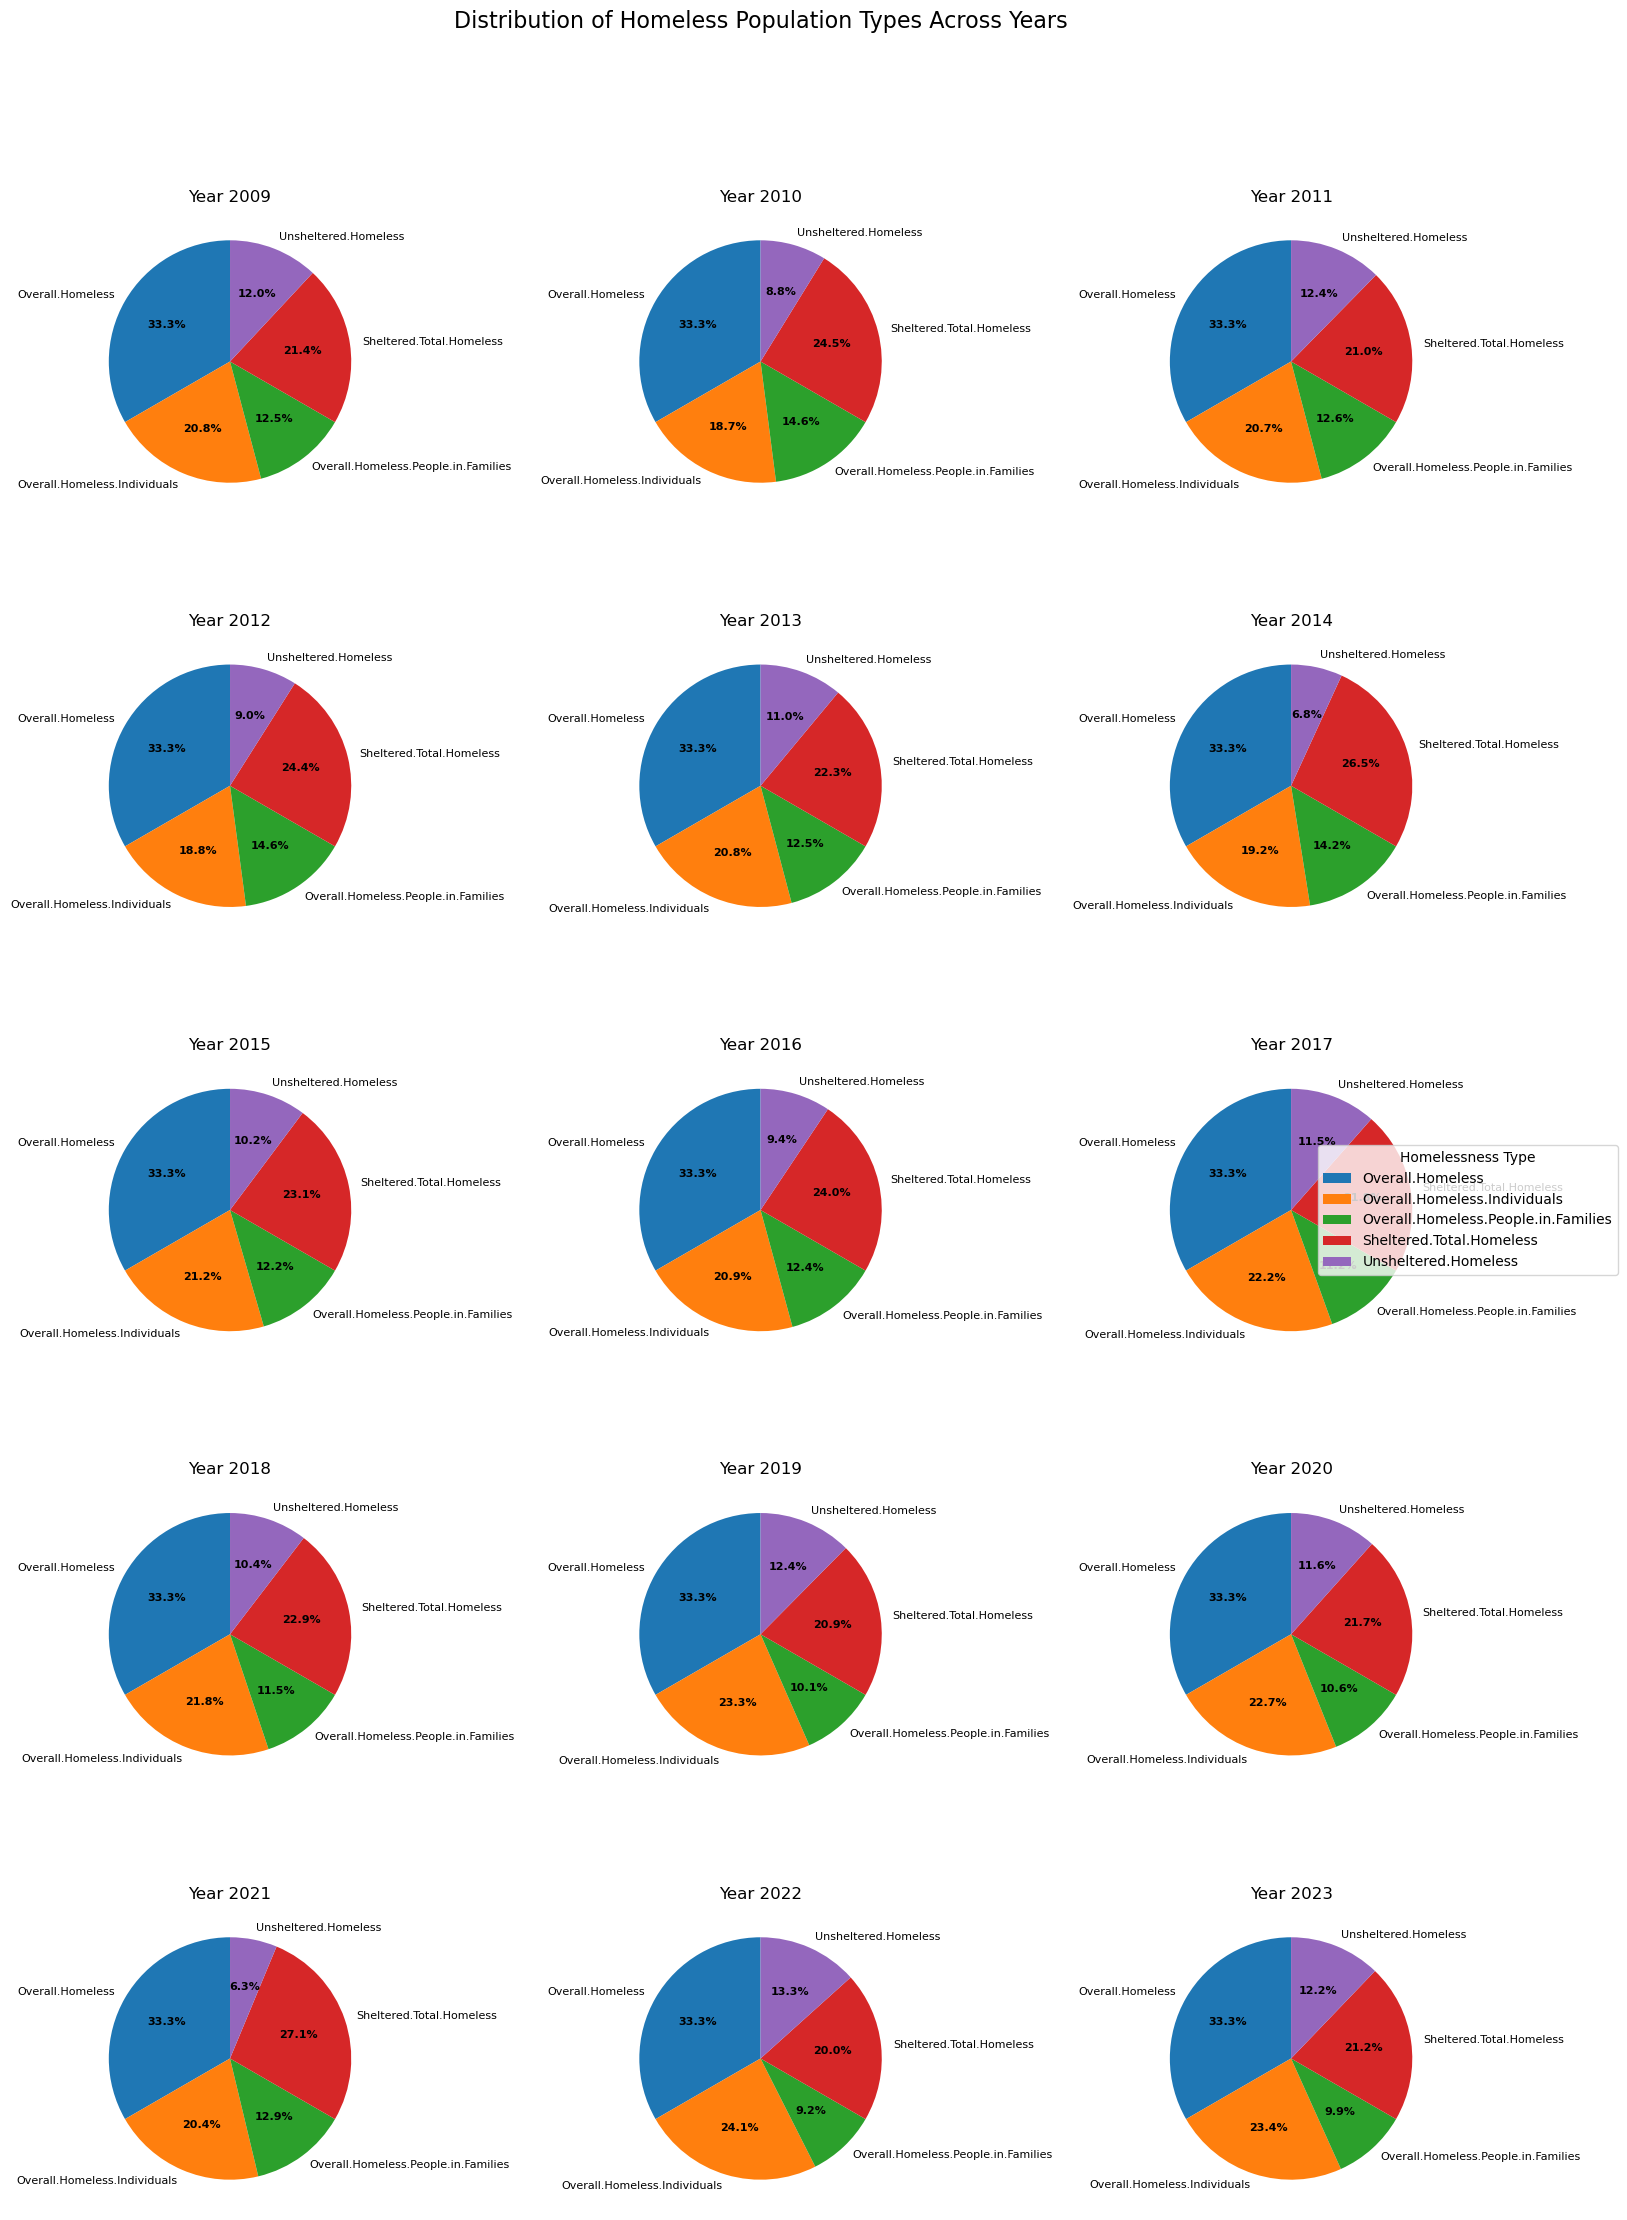

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

def process_csv(file_path):
    df = pd.read_csv(file_path)
    
    # Select only 'Sheltered and Unsheltered Count' data
    df_filtered = df[df['Count Types'] == 'Sheltered and Unsheltered Count']
    
    # Group by year and homelessness type
    grouped = df_filtered.pivot_table(values='Count', index='Year', 
                                      columns='Homelessness.Type', aggfunc='sum')
    
    return grouped

def create_multi_pie_charts(data):
    num_years = len(data)
    cols = min(3, num_years)  # Maximum 3 pie charts per row
    rows = math.ceil(num_years / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
    
    # Adjust the overall layout
    fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.4)
    
    # Add title with adjusted position
    fig.suptitle('Distribution of Homeless Population Types Across Years', fontsize=16, y=0.98)
    
    # Ensure axes is always a 2D array
    if rows == 1 and cols == 1:
        axes = np.array([[axes]])
    elif rows == 1:
        axes = axes.reshape(1, -1)
    elif cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, (year, year_data) in enumerate(data.iterrows()):
        row = i // cols
        col = i % cols
        ax = axes[row, col]
        
        # Remove data that is 0 or NaN
        year_data = year_data[year_data > 0].dropna()
        
        # Create pie chart
        wedges, texts, autotexts = ax.pie(year_data, labels=year_data.index, autopct='%1.1f%%', startangle=90)
        
        ax.set_title(f'Year {year}')
        
        # Make labels smaller to avoid overlap
        plt.setp(texts, size=8)
        plt.setp(autotexts, size=8, weight="bold")
    
    # Remove extra subplots
    for i in range(num_years, rows*cols):
        row = i // cols
        col = i % cols
        fig.delaxes(axes[row, col])
    
    # Add an overall legend
    fig.legend(wedges, year_data.index, title="Homelessness Type", 
               loc="center right", bbox_to_anchor=(0.98, 0.5))
    
    plt.savefig('homeless_count_multi_pie_charts.png', dpi=300, bbox_inches='tight')
    print("Multi-year pie charts have been saved as 'homeless_count_multi_pie_charts.png'")

def main():
    file_path = r"C:\Users\86133\Desktop\final_dataset.csv"
    data = process_csv(file_path)
    create_multi_pie_charts(data)

if __name__ == "__main__":
    main()

Line chart has been saved as 'homeless_count_line_chart.png'


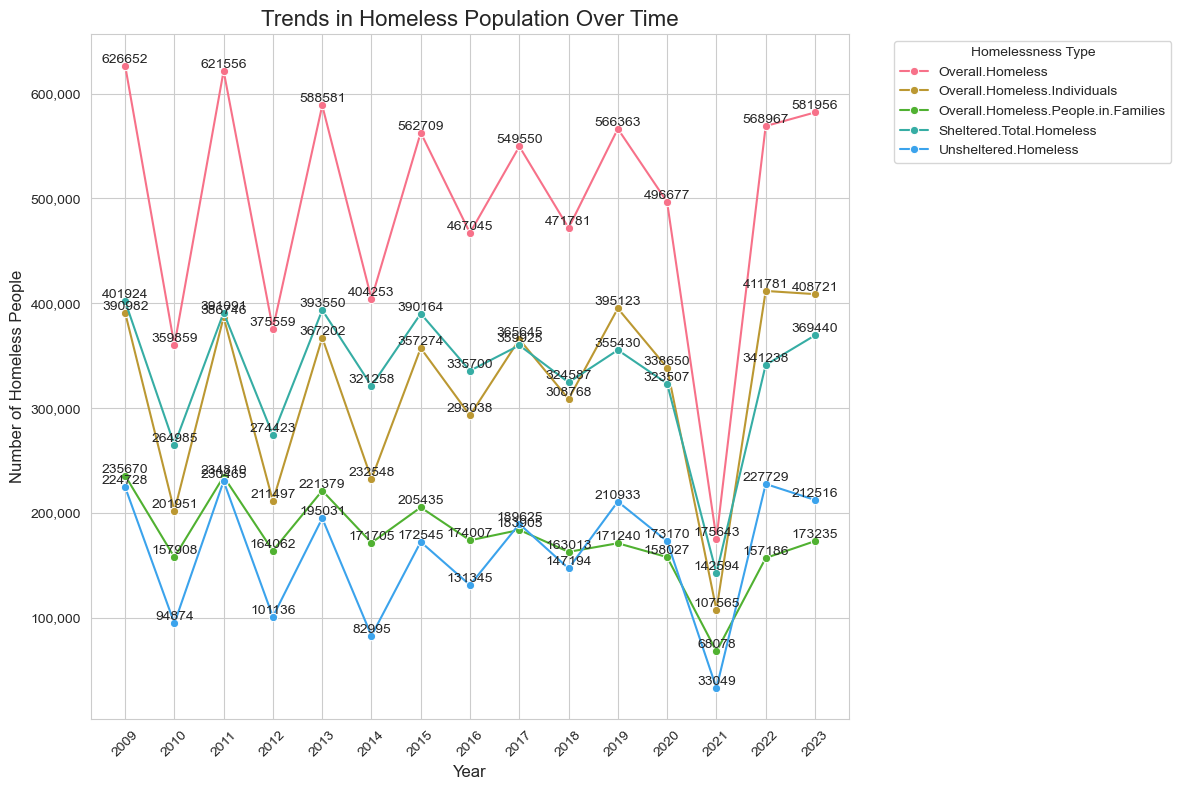

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def process_csv(file_path):
    df = pd.read_csv(file_path)
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    
    # Select only 'Sheltered and Unsheltered Count' data
    df_filtered = df[df['Count Types'] == 'Sheltered and Unsheltered Count']
    
    # Group by year and homelessness type
    grouped = df_filtered.pivot_table(values='Count', index='Year', 
                                      columns='Homelessness.Type', aggfunc='sum')
    
    return grouped

def create_line_chart(data):
    plt.figure(figsize=(12, 8))
    
    # Use Seaborn to create a line chart
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    for column in data.columns:
        sns.lineplot(x=data.index, y=data[column], label=column, marker='o')
    
    plt.title('Trends in Homeless Population Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Homeless People', fontsize=12)
    plt.legend(title='Homelessness Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set x-axis ticks to years
    years = data.index.year
    plt.xticks(data.index, years, rotation=45)
    
    # Add value labels to each data point
    for column in data.columns:
        for x, y in zip(data.index, data[column]):
            if pd.notna(y):
                plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

    # Set y-axis tick format
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    plt.tight_layout()
    plt.savefig('homeless_count_line_chart.png', dpi=300, bbox_inches='tight')
    print("Line chart has been saved as 'homeless_count_line_chart.png'")

def main():
    file_path = r"C:\Users\86133\Desktop\final_dataset.csv"
    data = process_csv(file_path)
    create_line_chart(data)

if __name__ == "__main__":
    main()